In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel("BD_Global.xlsx",sheet_name="BD")

In [ ]:
df= data.copy()

# **Présentation des données**

In [ ]:
print("Notre base de données contient {} lignes et {} colonnes.".format(df.shape[0], df.shape[1]))

Notre base de données contient 881 lignes et 51 colonnes.


In [ ]:
df.dtypes.value_counts()

float64    39
object     11
int64       1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 51 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              881 non-null    object 
 1   Year                                                 881 non-null    int64  
 2   Rating                                               881 non-null    object 
 3   Nominal_GDP(bil.LC)                                  881 non-null    float64
 4   Nominal_GDP(bil.US$)                                 881 non-null    float64
 5   GDP_per_capita(US$)                                  881 non-null    float64
 6   Real_GDP_growth(%)                                   881 non-null    float64
 7   Real_GDP_per_capita_growth(%)                        881 non-null    float64
 8   Real_investment_growth(%)                            839 non-null    f

# **Préparation des données**
Afin de pouvoir générer un modèle de Machine Learning, il faut tout d'abord préparer la base de données.
Dans notre cas, on désire modéliser la notation souveraine établie par Standard and Poor's. Cette variable est de type qualitative.

Pour les variables explicatives, elles contiennent toutes des valeurs numériques, il suffit juste changer leurs types à `float`.



In [ ]:
print("Nous avons  {} doublons dans Df.".format(df.duplicated().sum()))

Nous avons  0 doublons dans Df.


In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Country                                                0.000000
Liquid_assets/GDP                                      0.000000
Net_GG_debt/GDP(%)                                     0.000000
Gross_GG_debt/GDP(%)                                   0.000000
GG_Expenditures/GDP(%)                                 0.000000
GG_Revenues/GDP(%)                                     0.000000
Primary_GG_balance/GDP(%)                              0.000000
Change_in_Net_GG_debt/GDP(%)                           0.000000
GG_balance/GDP(%)                                      0.000000
Exchange_rate_year-end(LC/$)                           0.000000
GDP_deflator_growth(%)                                 0.000000
CPI_growth(%)                                          0.000000
Debt/Revenues(%)                                       0.000000
Year                                                   0.000000
Rating                                                 0.000000
Real_GDP_per_capita_growth(%)           

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   index                                                732 non-null    int64  
 1   Country                                              732 non-null    object 
 2   Year                                                 732 non-null    int64  
 3   Rating                                               732 non-null    object 
 4   Nominal_GDP(bil.LC)                                  732 non-null    float64
 5   Nominal_GDP(bil.US$)                                 732 non-null    float64
 6   GDP_per_capita(US$)                                  732 non-null    float64
 7   Real_GDP_growth(%)                                   732 non-null    float64
 8   Real_GDP_per_capita_growth(%)                        732 non-null    f

On élimine les variables inutiles dans notre étude :

In [ ]:
df=df.drop('Country',axis = 1)
df=df.drop('Year',axis = 1)
df=df.drop('index',axis = 1)

In [ ]:
X = df.drop(['Rating'], axis = 1)
y = df.loc[:,['Rating']]

X : représente les variables explicatives.

y : représente notre variable cible.

In [ ]:
X = X.astype(float)

In [ ]:
data_final = y.join(X)

# **Analyse Exploratoire des données**

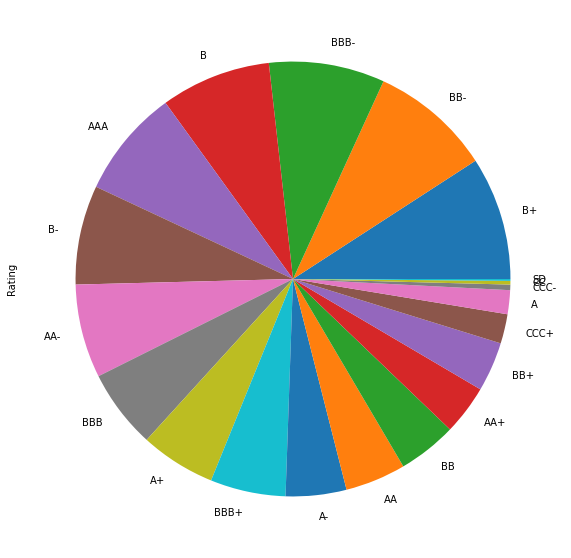

In [ ]:
plt.figure(figsize=(10, 10))
data_final['Rating'].value_counts().plot.pie()

On remarque qu'on a plusieurs modalités, on décide de réduire le nombre de modalités.

On élimine les observations ayant comme modalité 'SD' et 'CC' puisqu'ils risquent d'influencer notre modèle négativement.

In [ ]:
data_final = data_final.loc[data_final["Rating"] != "CC"]
data_final = data_final.loc[data_final["Rating"] != "SD"]

In [ ]:
data_final['Rating'].replace(["CCC-"], ["CCC"], inplace=True)
data_final['Rating'].replace(["AA+"], ["AA"], inplace=True)
data_final['Rating'].replace(["AA-"], ["AA"], inplace=True)
data_final['Rating'].replace(["A+"], ["A"], inplace=True)
data_final['Rating'].replace(["A-"], ["A"], inplace=True)
data_final['Rating'].replace(["B+"], ["B"], inplace=True)
data_final['Rating'].replace(["B-"], ["B"], inplace=True)
data_final['Rating'].replace(["BB+"], ["BB"], inplace=True)
data_final['Rating'].replace(["BB-"], ["BB"], inplace=True)
data_final['Rating'].replace(["BBB+"], ["BBB"], inplace=True)
data_final['Rating'].replace(["BBB-"], ["BBB"], inplace=True)
data_final['Rating'].replace(["CCC+"], ["CCC"], inplace=True)

<Figure size 720x720 with 0 Axes>

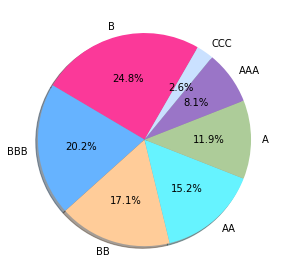

In [ ]:
plt.figure(figsize=(10, 10))
labels = ["B","BBB","BB","AA","A","AAA","CCC"] 
colors = ['#fb3999','#66b3ff', '#ffcc99',"#66f3ff",'#adcc99','#9a75c7','#CAE1FF']
RatingValues = data_final.Rating.value_counts()
fig1, f1 = plt.subplots()
f1.pie(RatingValues,labels = labels,colors=colors, autopct='%1.1f%%',shadow=True, startangle=60) 
plt.tight_layout()
plt.show()

In [ ]:
numerical_cols = data_final.drop('Rating',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

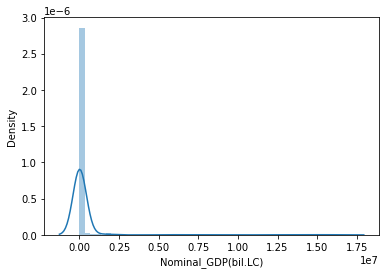

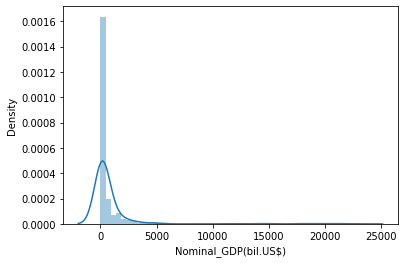

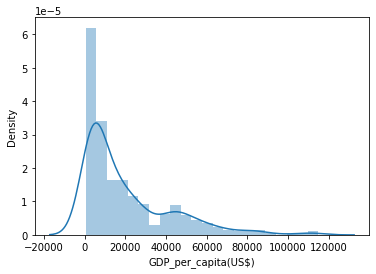

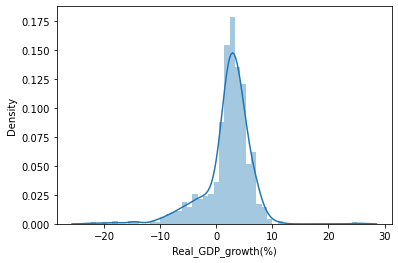

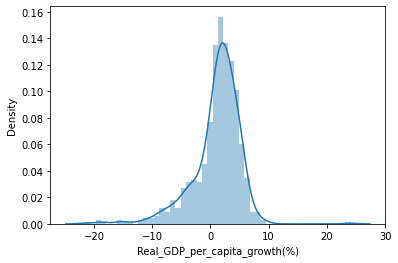

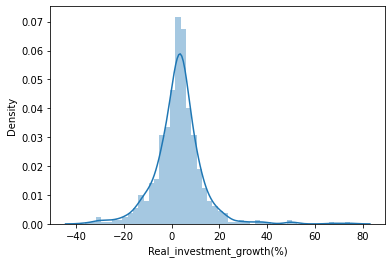

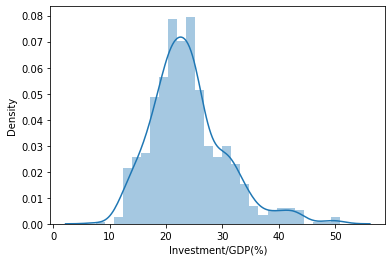

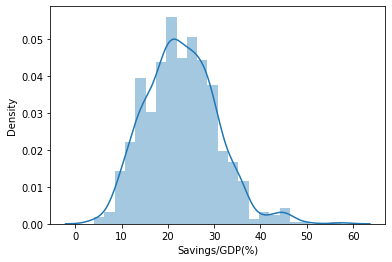

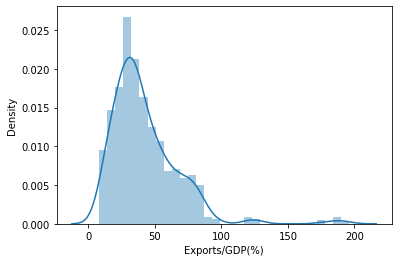

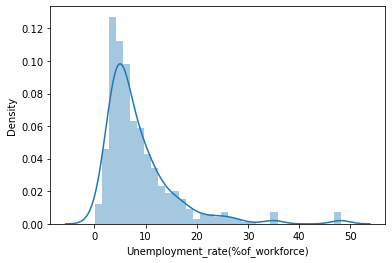

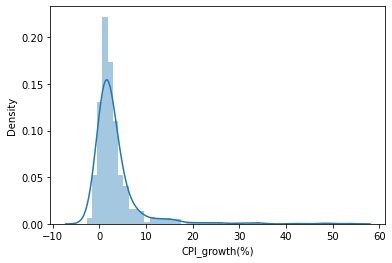

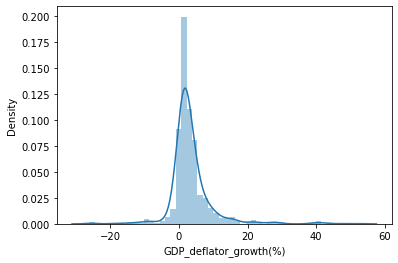

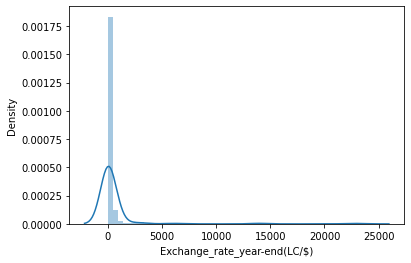

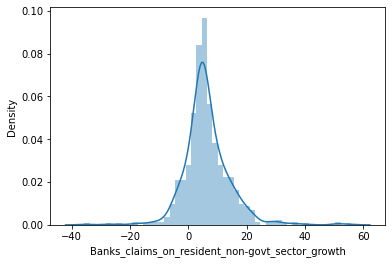

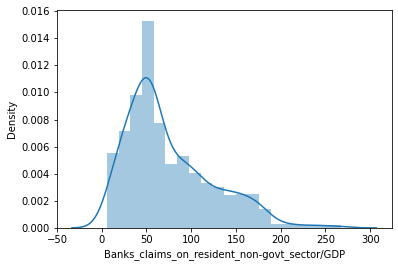

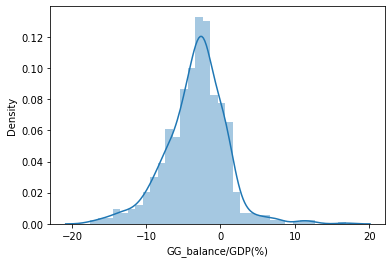

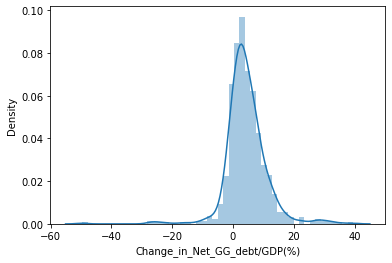

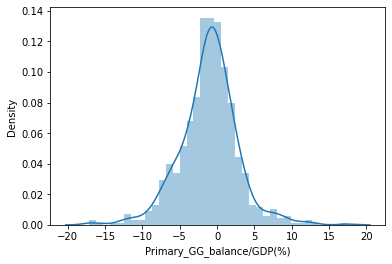

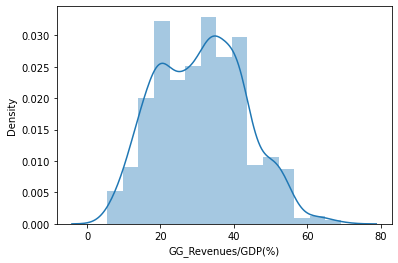

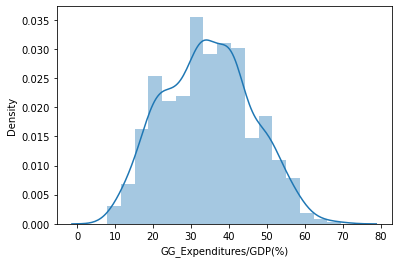

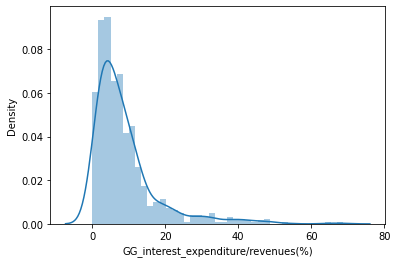

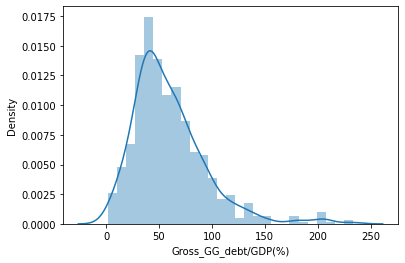

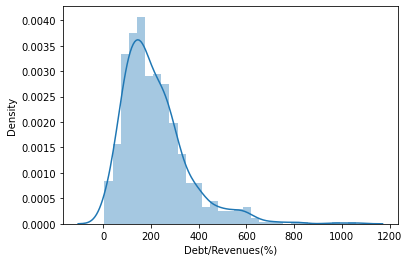

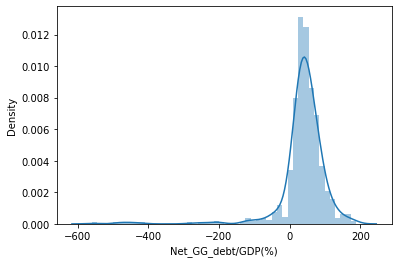

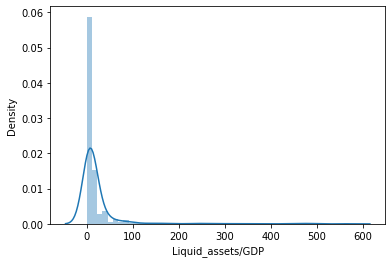

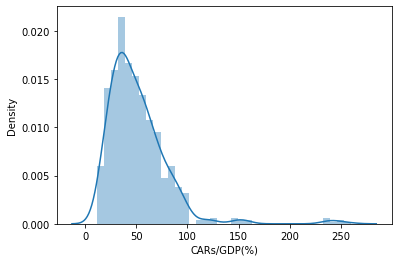

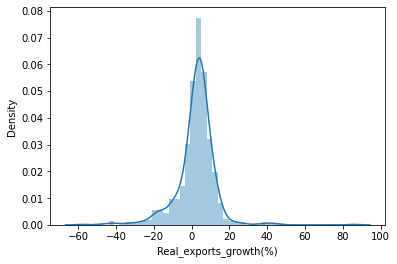

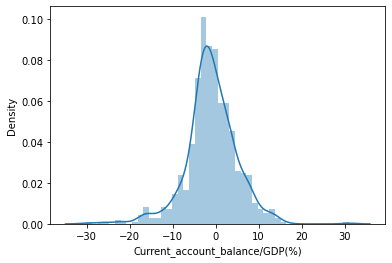

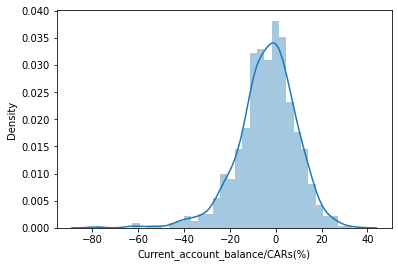

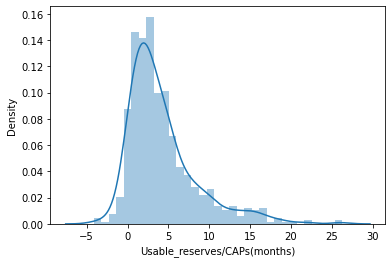

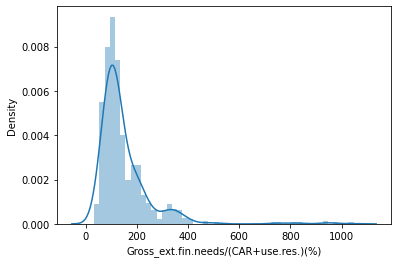

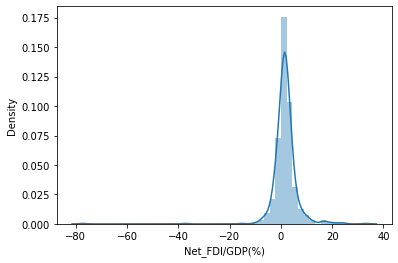

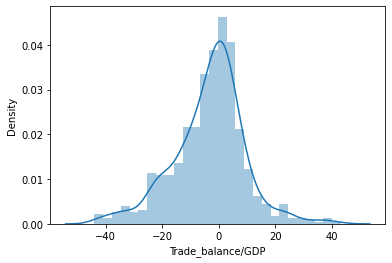

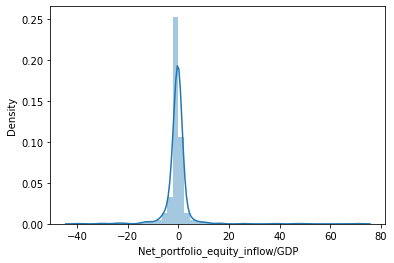

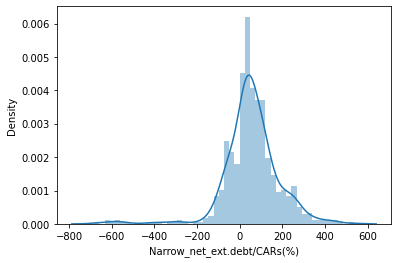

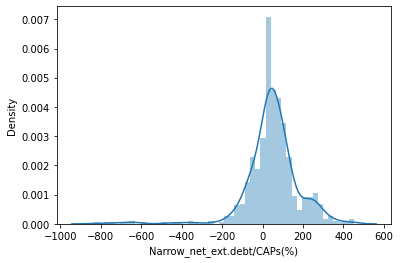

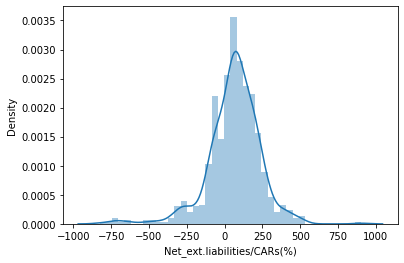

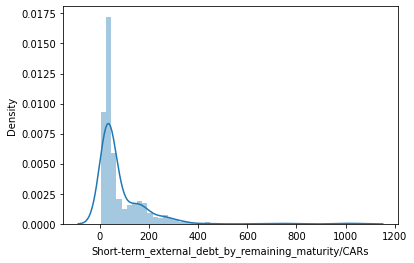

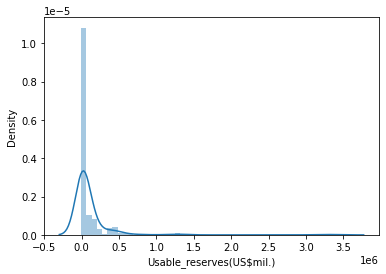

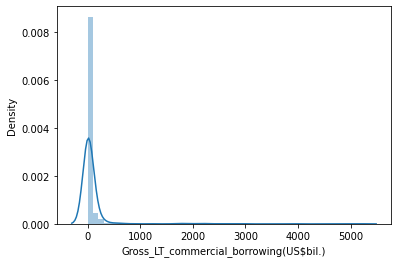

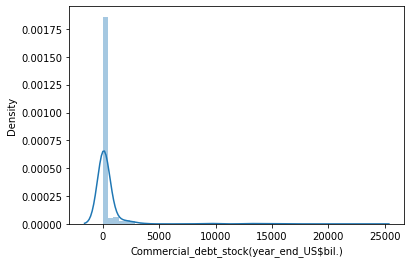

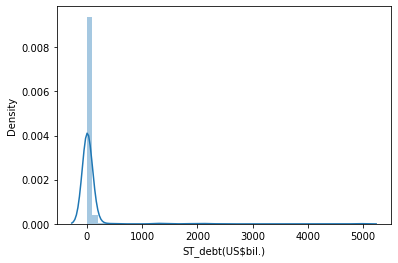

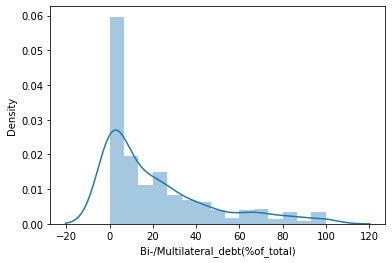

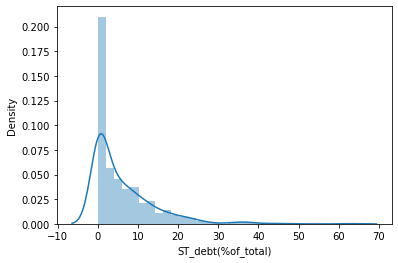

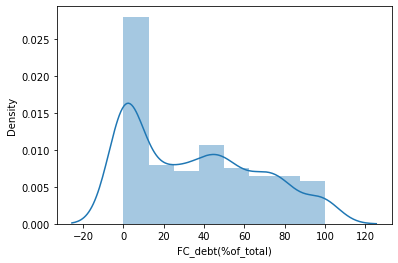

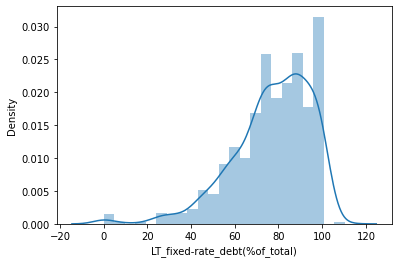

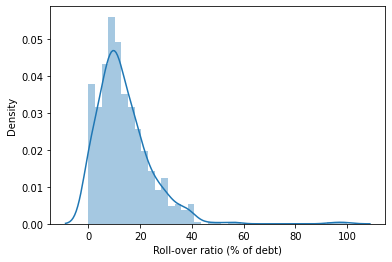

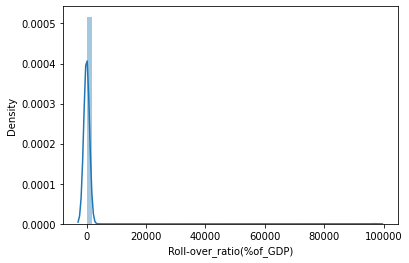

In [ ]:
for col in data_final.select_dtypes('float'):
    plt.figure()
    sns.distplot(data_final[col])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

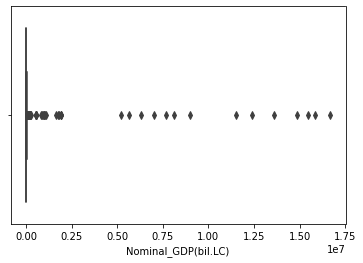

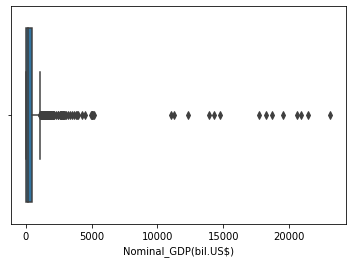

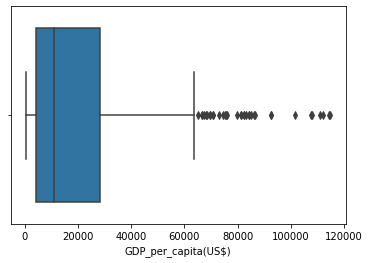

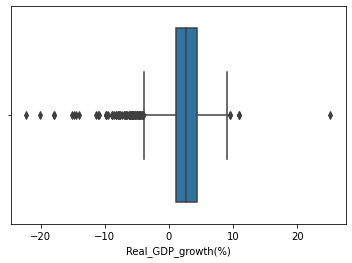

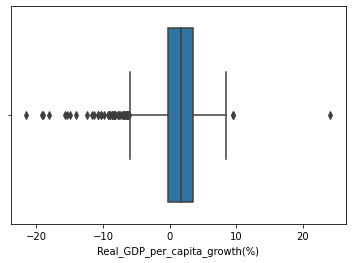

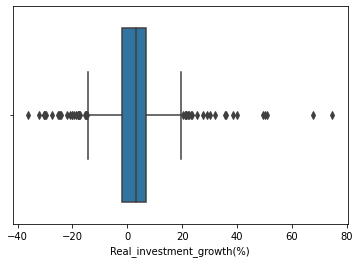

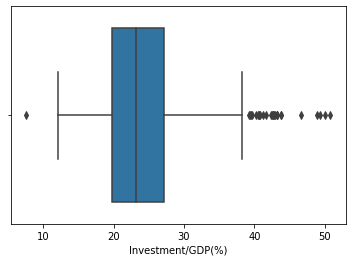

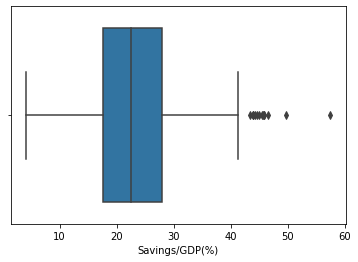

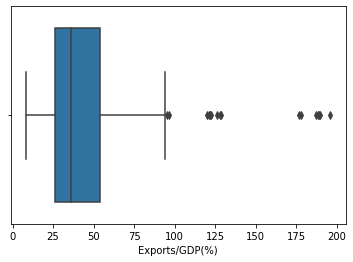

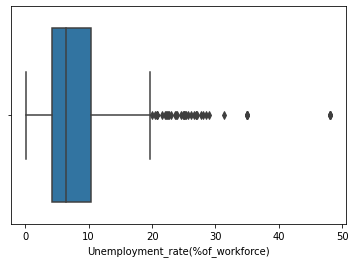

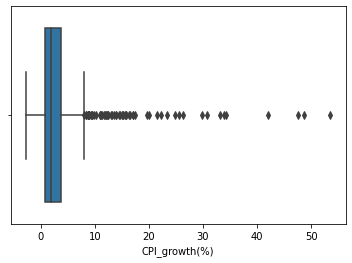

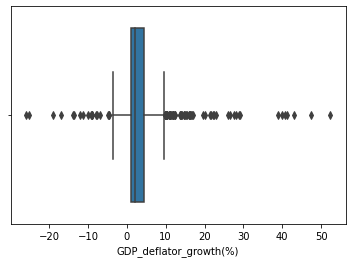

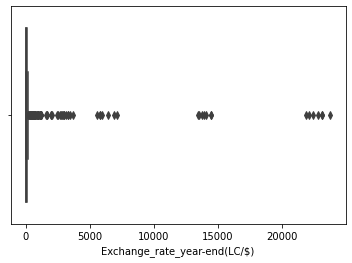

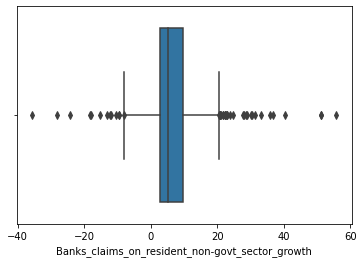

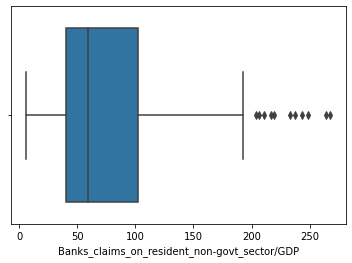

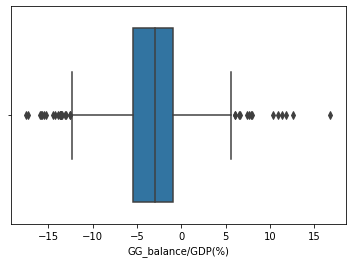

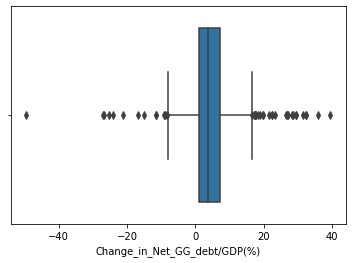

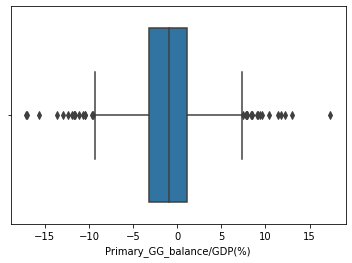

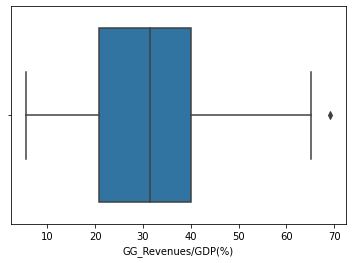

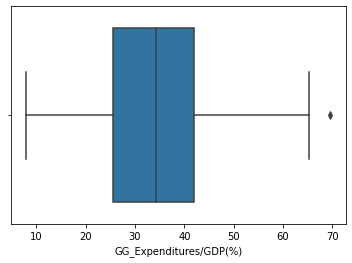

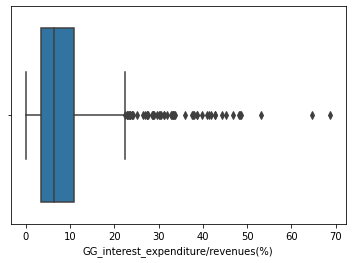

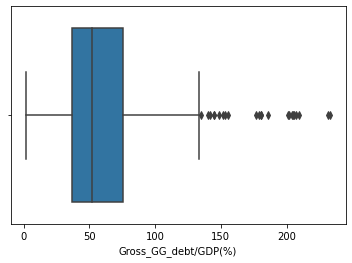

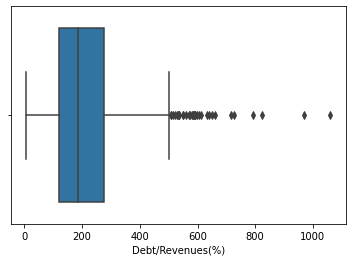

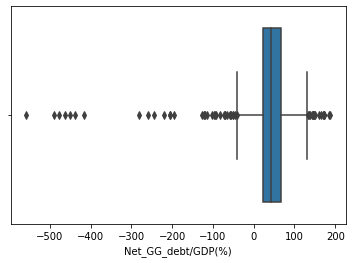

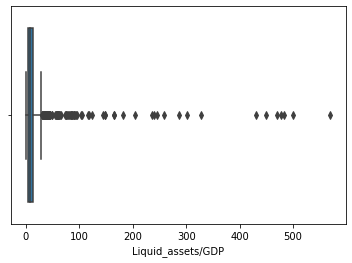

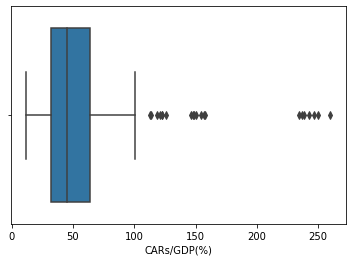

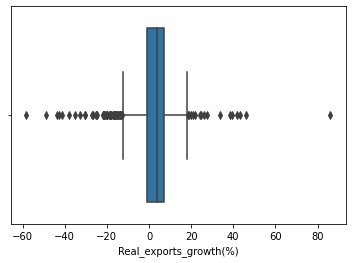

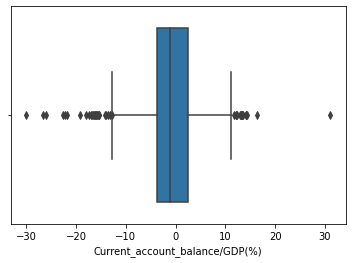

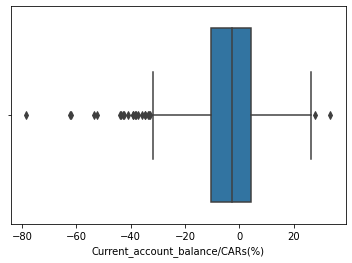

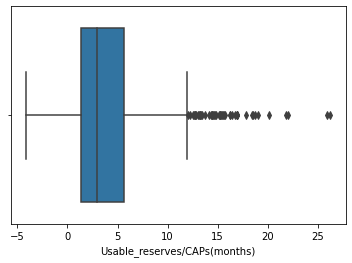

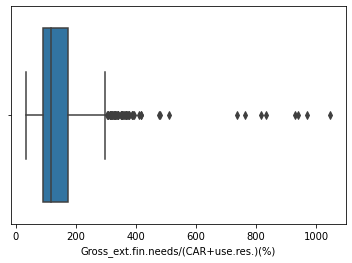

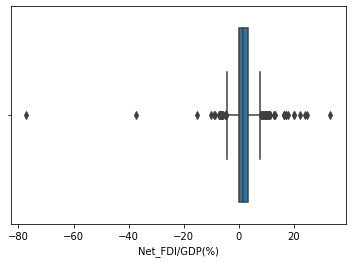

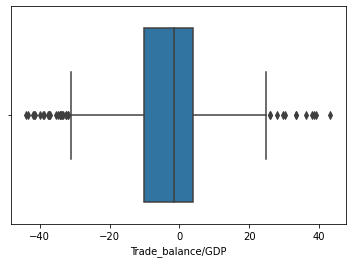

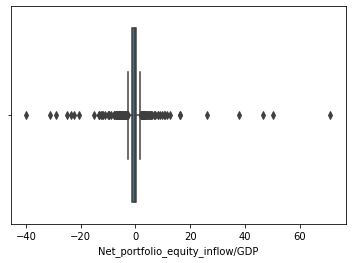

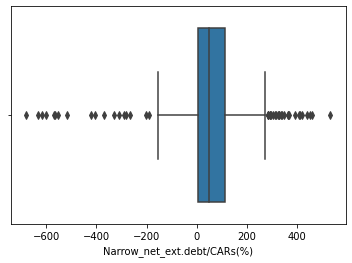

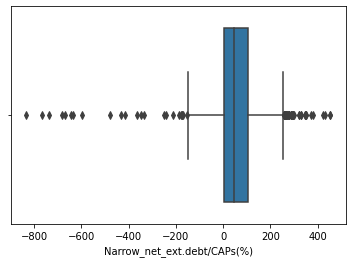

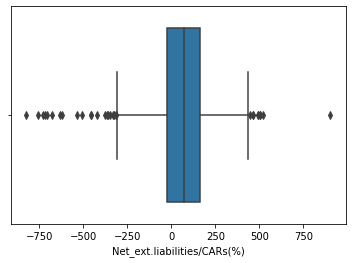

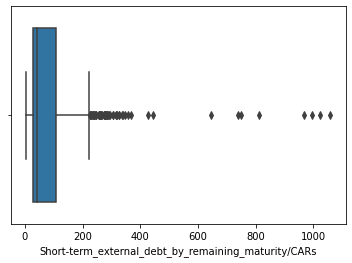

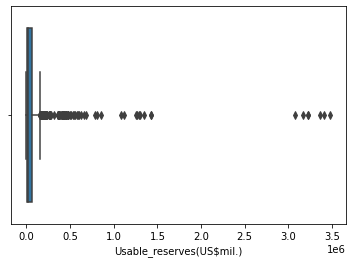

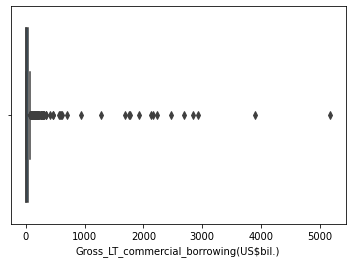

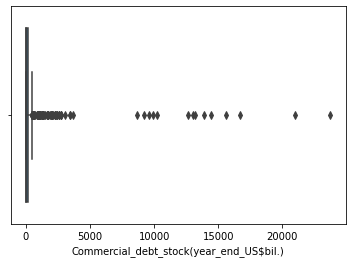

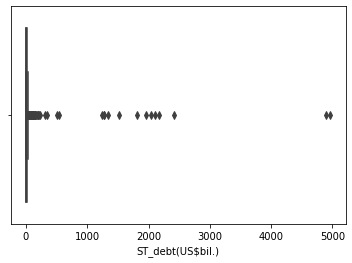

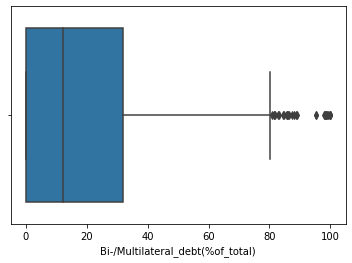

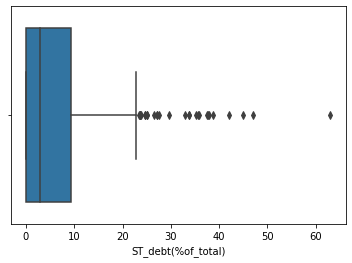

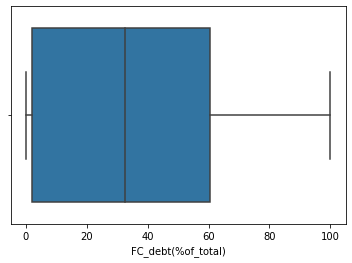

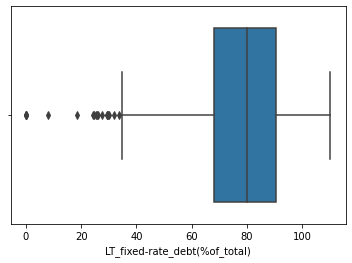

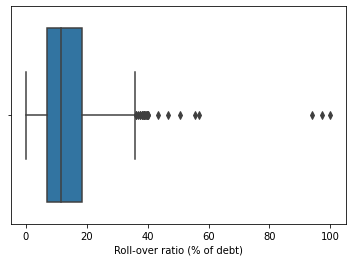

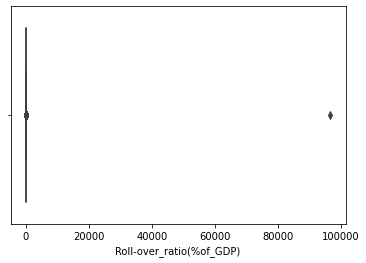

In [ ]:
for col in data_final.select_dtypes('float'):
    plt.figure()
    sns.boxplot(data_final[col])

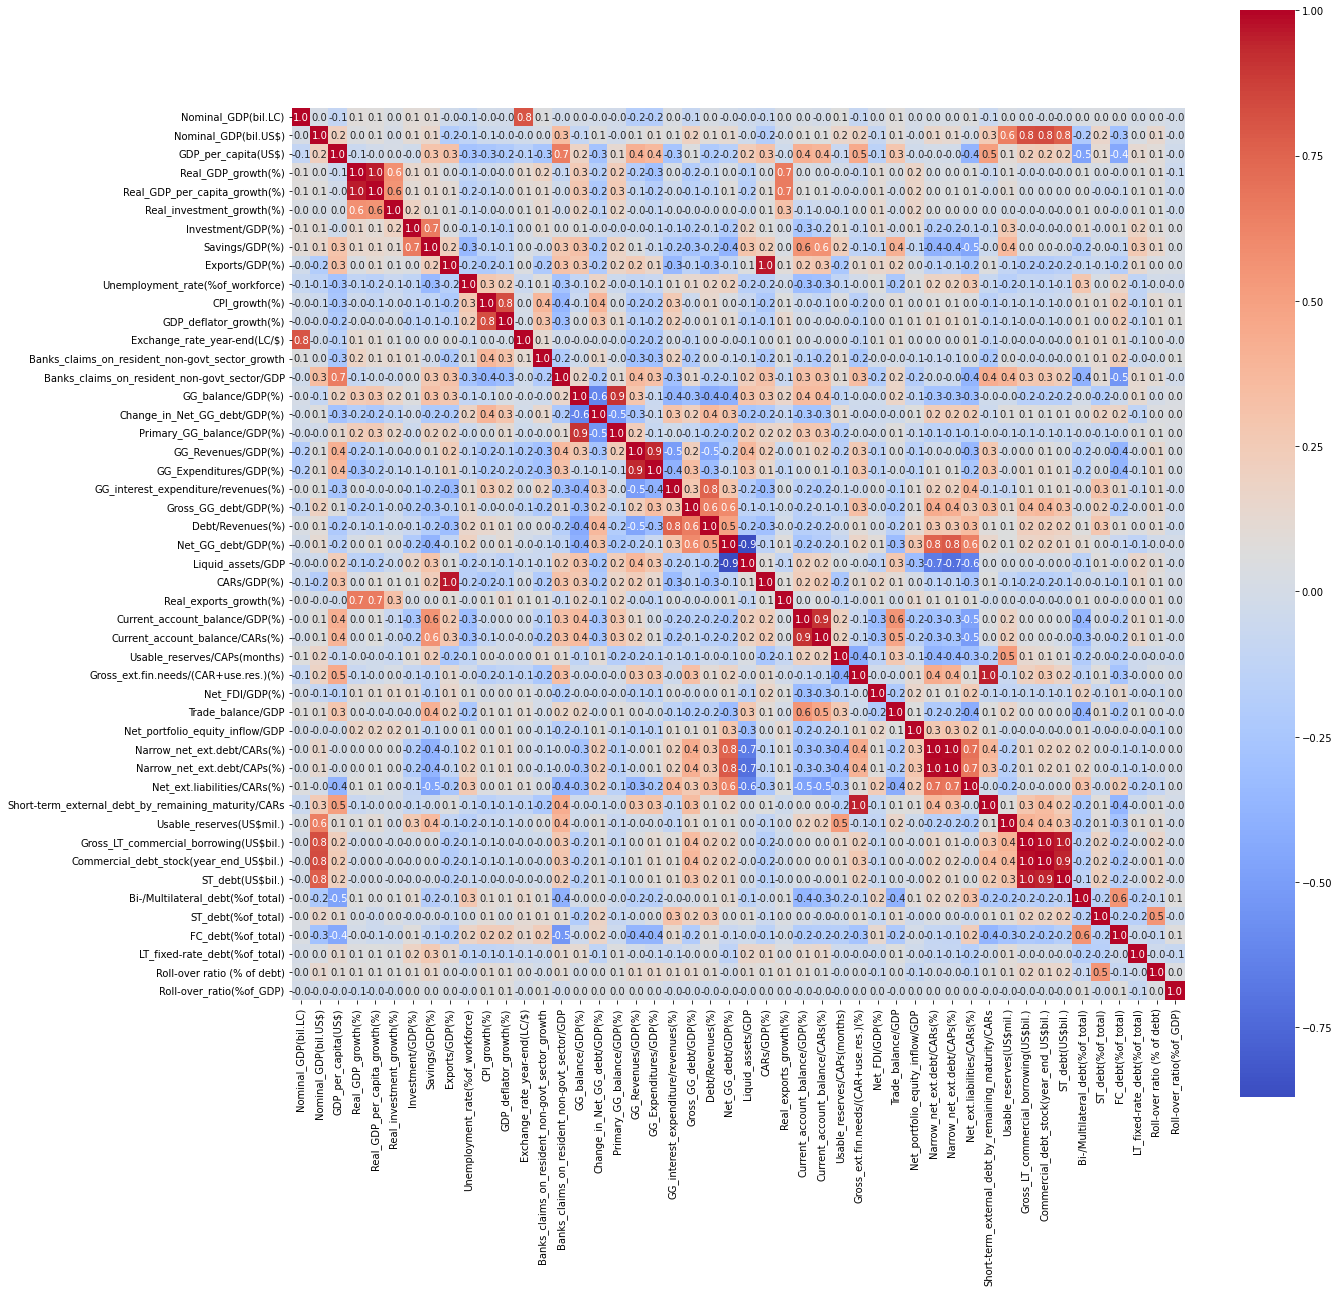

In [ ]:
plt.figure(figsize=(20, 20))
g = sns.heatmap(X.corr(), annot=True, cmap='coolwarm', square=True, fmt='.1f')

In [ ]:
data_final.to_csv('Cleaned_Data.csv')